## Packages

In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install math
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install xgboost
!pip install lightbgm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2970 sha256=d0e6713d5d11919b53689c90326ed8699616ebfd1bec9aeea9770ca6310b8f8b
  Stored in directory: c:\users\harish gundala\appdata\local\pip\cache\wheels\5c\47\e1\386fa7740f1947ad87d16c68041c16ad8c23ca2bfd139a3fe5
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 8.1 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


# **Preprocessing**

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve, auc,RocCurveDisplay,roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_val_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

### Reading the dataset containing the csv file

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Analysis of data

In [27]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
np.unique(df['HeartDisease'])

array([0, 1], dtype=int64)

In [29]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

# **Visualisation**

### Visualisation of Categorical Data

In [30]:
%matplotlib inline

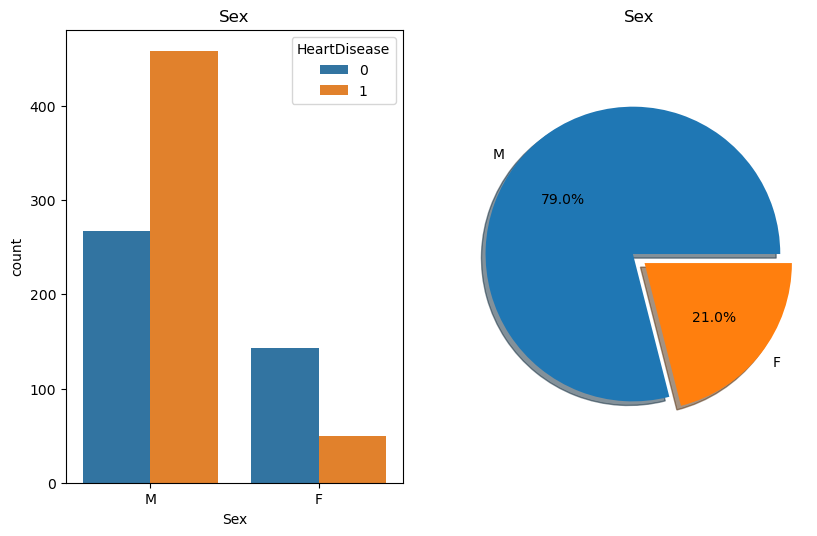

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(data = df, x = df.Sex,hue=df.HeartDisease)
plt.title('Sex') 

plt.subplot(3,4,2)
sex = df.Sex.value_counts()
plt.pie(sex,explode=[0.0,0.1],autopct='%0.1f%%',shadow=True,labels=sex.index)
plt.title('Sex')
plt.axis('equal')

plt.show()

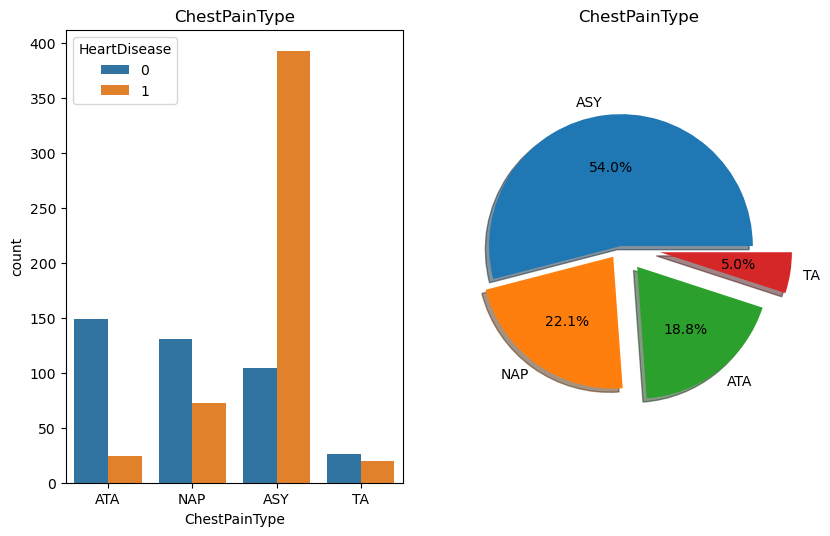

In [39]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,3)
sns.countplot(x = df['ChestPainType'],hue=df.HeartDisease)
plt.title('ChestPainType') 

plt.subplot(3,4,4)
chest = df['ChestPainType'].value_counts()
plt.pie(chest,explode=[0.0,0.1,0.2,0.3],labels=chest.index,autopct='%.1f%%',shadow=True)
plt.title('ChestPainType')
plt.axis('equal')

plt.show()

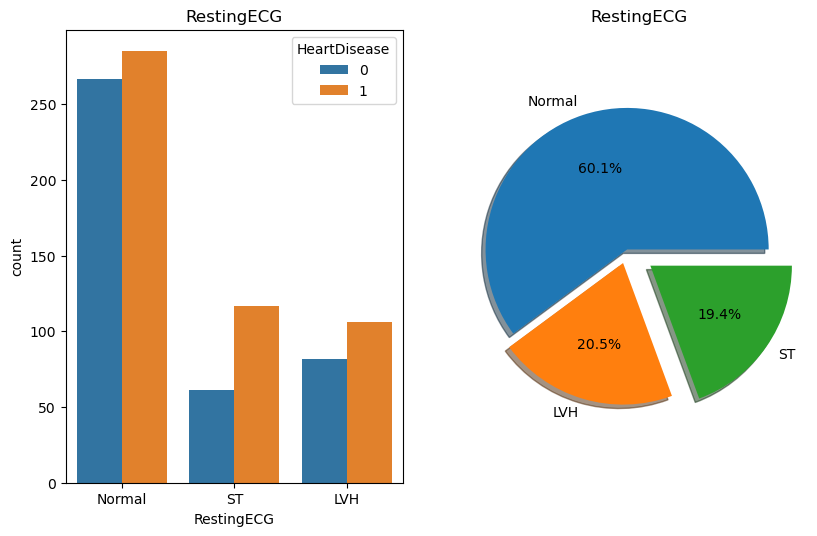

In [40]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,5)
sns.countplot(x = df['RestingECG'],hue=df.HeartDisease)
plt.title('RestingECG') 

plt.subplot(3,4,6)
ecg = df['RestingECG'].value_counts()
plt.pie(ecg,explode=[0.0,0.1,0.2],labels=ecg.index,autopct='%.1f%%',shadow=True)
plt.title('RestingECG')
plt.axis('equal')

plt.show()

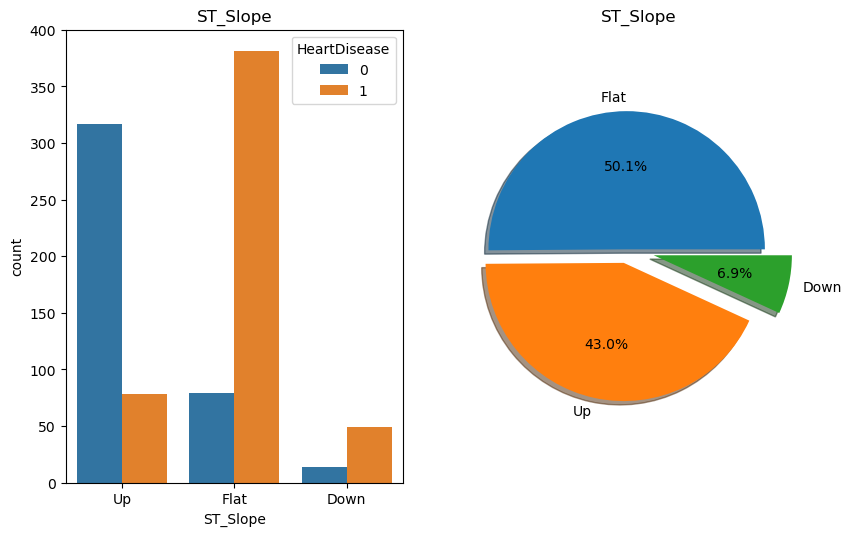

In [41]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,7)
sns.countplot(x = df.ST_Slope,hue=df.HeartDisease)
plt.title('ST_Slope') 

plt.subplot(3,4,8)
st = df.ST_Slope.value_counts()
plt.pie(st,explode=[0.0,0.1,0.2],autopct='%0.1f%%',shadow=True,labels=st.index)
plt.title('ST_Slope')
plt.axis('equal')

plt.show()

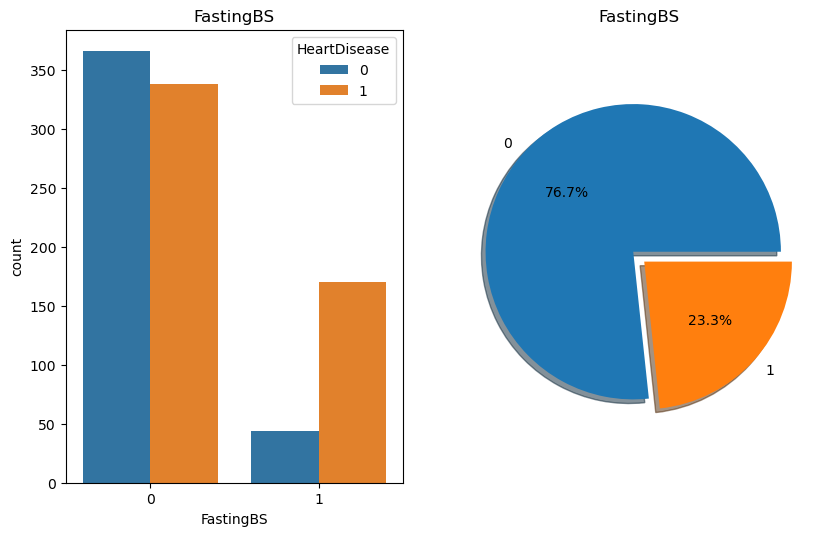

In [42]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,9)
sns.countplot(x = df['FastingBS'],hue=df.HeartDisease)
plt.title('FastingBS') 

plt.subplot(3,4,10)
fast = df['FastingBS'].value_counts()
plt.pie(fast,explode=[0.0,0.1],autopct='%0.1f%%',shadow=True,labels=fast.index)
plt.title('FastingBS')
plt.axis('equal')

plt.show()

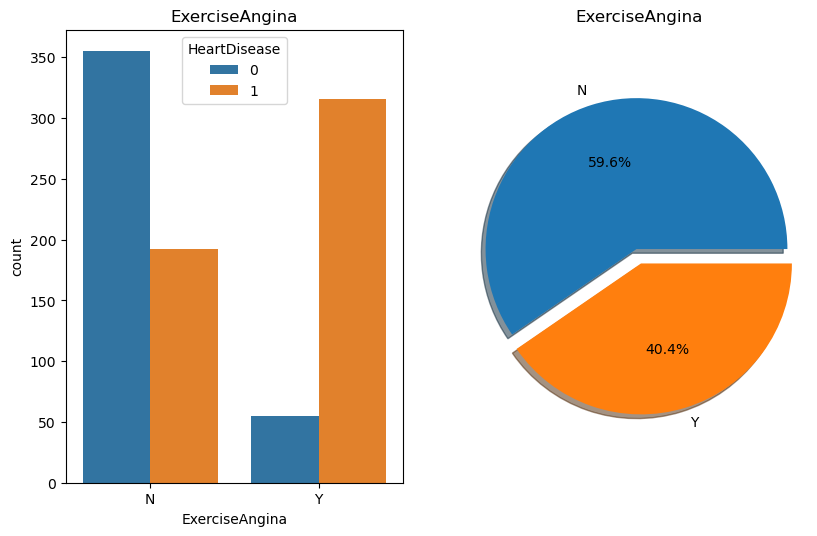

In [43]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,11)
sns.countplot(x = df['ExerciseAngina'],hue=df.HeartDisease)
plt.title('ExerciseAngina')

plt.subplot(3,4,12)
ex =df['ExerciseAngina'].value_counts()
plt.pie(ex,explode=[0.0,0.1],autopct='%0.1f%%',shadow=True,labels=ex.index)
plt.title('ExerciseAngina')
plt.axis('equal')

plt.show()

### Visualisation of Continuous Data

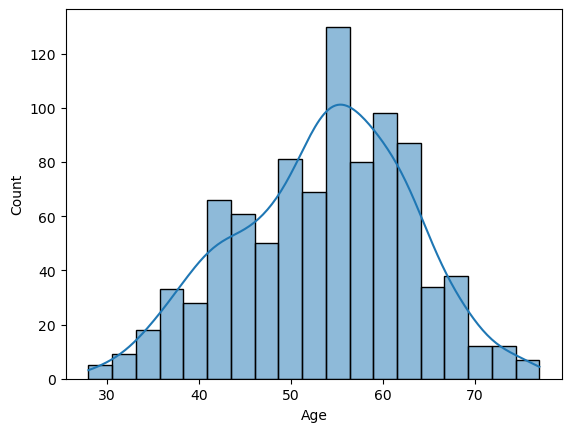

In [46]:
sns.histplot(df['Age'], label='Age', kde=True)
plt.show()

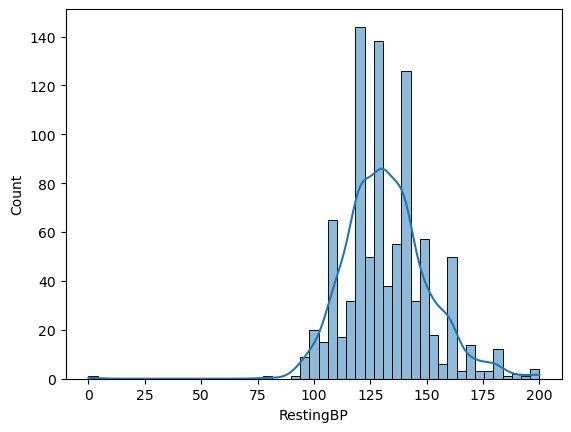

In [47]:
sns.histplot(df['RestingBP'], label='RestingBP', kde=True)
plt.show()

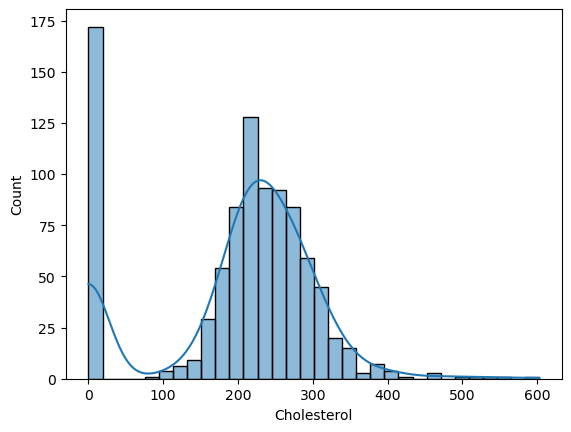

In [48]:
sns.histplot(df['Cholesterol'], label='Cholesterol', kde=True)
plt.show()

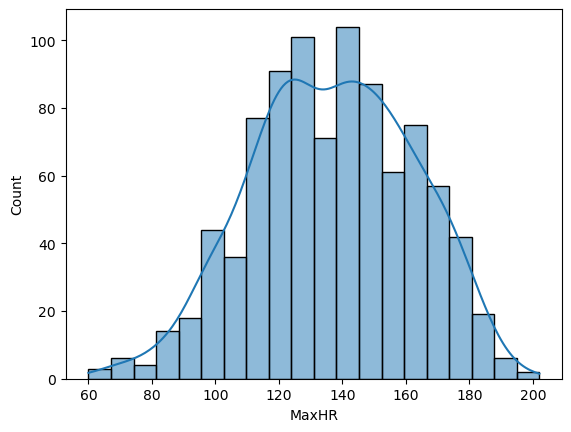

In [49]:
sns.histplot(df['MaxHR'], label='MaxHR', kde=True)
plt.show()

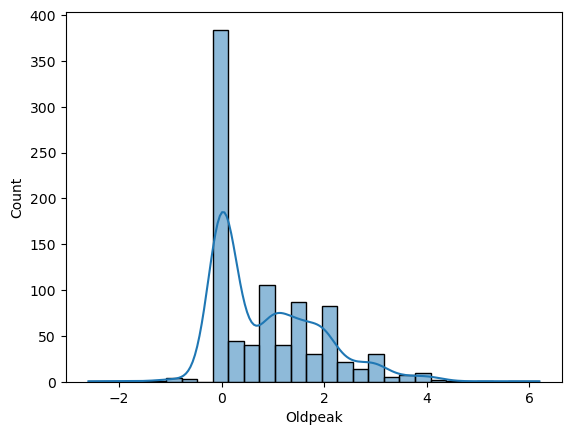

In [50]:
sns.histplot(df['Oldpeak'], label='Oldpeak', kde=True)
plt.show()

### Correlation Matrix

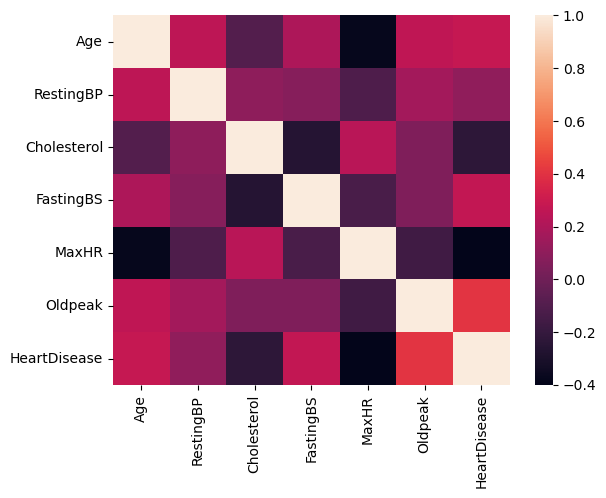

In [51]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

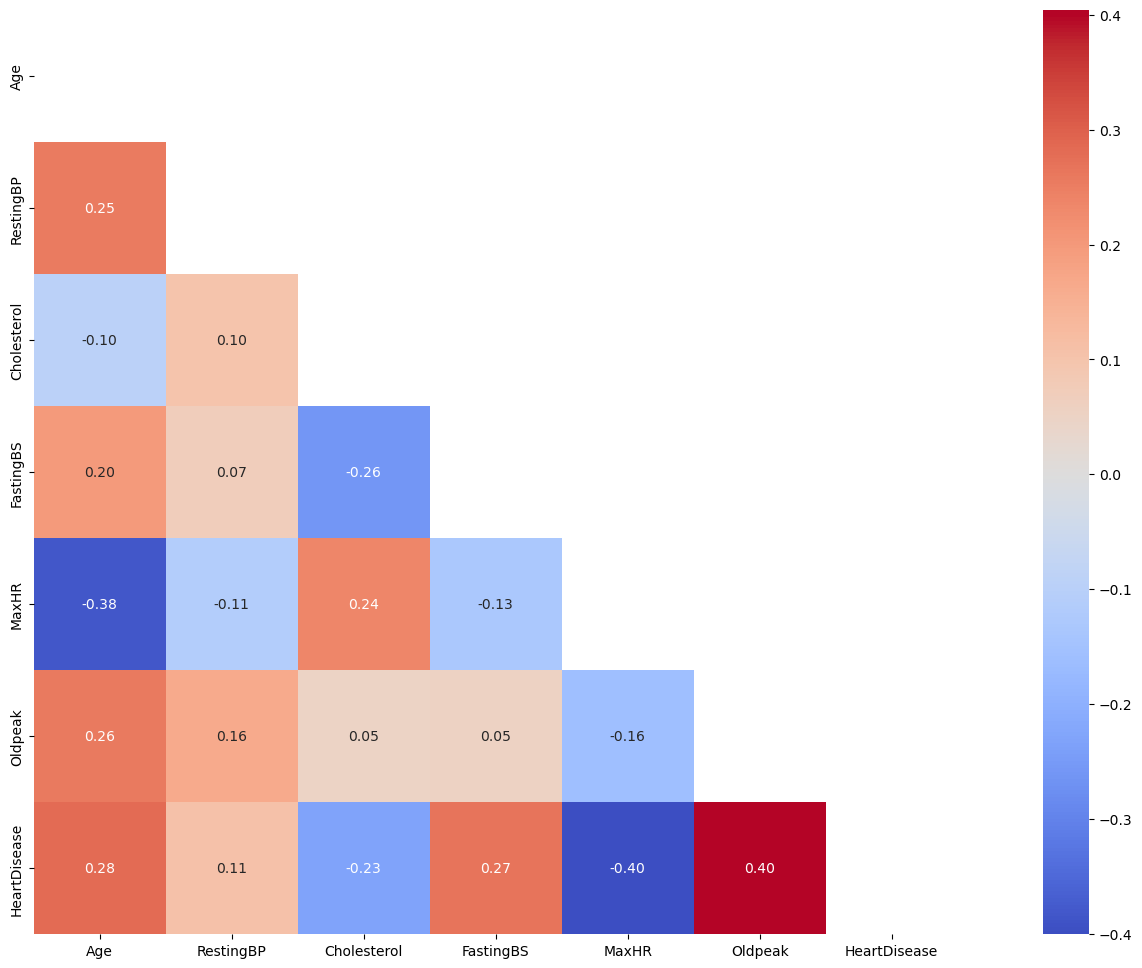

In [52]:
mask = np.triu(np.ones_like(corr,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(corr,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [53]:
corr['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### Label Encoding the categorical columns

In [54]:
cate = ['Sex','ExerciseAngina','RestingECG','ChestPainType','ST_Slope']


for i in cate:
    LE = preprocessing.LabelEncoder()
    df[i] = LE.fit_transform(df[i])

#df.drop(['ST_Slope'],axis=1,inplace=True)

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

### Applying PCA as a dimensionality reduction technique

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X)
X_pca

array([[ 92.31094761, -29.44092723, -12.02319453,  -9.12024063],
       [-17.14271772, -13.75128639, -31.48579995,  -5.48398516],
       [ 81.90549795,  38.22744601,  16.06512596, -21.12448501],
       ...,
       [-69.00407582,  17.3379013 ,   5.33858836,   0.50824384],
       [ 39.207459  , -33.59828595,  -6.12276654,   9.05276058],
       [-21.43666353, -37.22417628, -13.58462592, -10.96941401]])

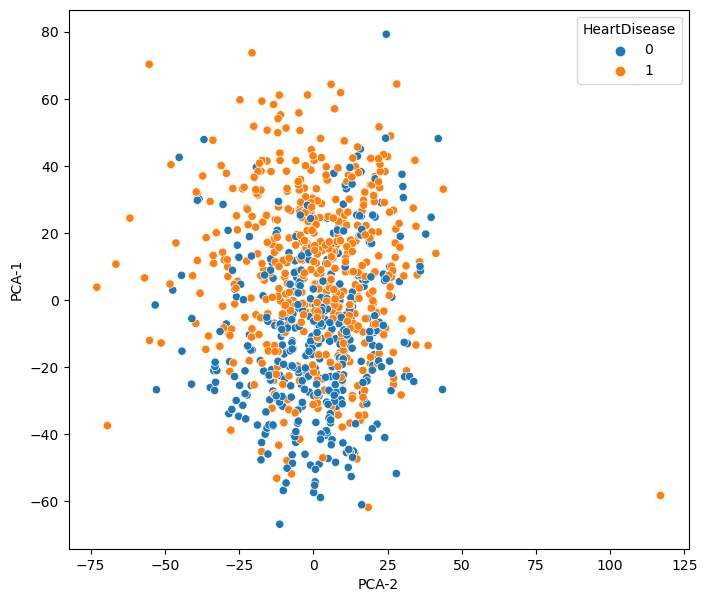

In [57]:
plt.figure(figsize=(8,7))
sns.scatterplot(x = X_pca[:,2], y = X_pca[:,1],hue=Y)
plt.xlabel('PCA-2')
plt.ylabel('PCA-1')
plt.show()

In [58]:
X_train_p, X_test_p, Y_train_p, Y_test_p = tts(X_pca,Y, stratify=Y,test_size=0.2, random_state=42)

In [59]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_p,Y_train_p)
preds = rfc.predict(X_test_p)

print(f'Accuracy on Testing Data : {accuracy_score(Y_test_p, preds):.4f}\n')
print(f'Confusion Matrix :\n{confusion_matrix(Y_test_p,preds)}\n')
print(classification_report(Y_test_p,preds))

Accuracy on Testing Data : 0.7120

Confusion Matrix :
[[53 29]
 [24 78]]

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        82
           1       0.73      0.76      0.75       102

    accuracy                           0.71       184
   macro avg       0.71      0.71      0.71       184
weighted avg       0.71      0.71      0.71       184



# **Training and Validating Models**

### Train, test, validation split

In [60]:
X_train, X_test, Y_train, Y_test = tts(X,Y, stratify=Y,test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = tts(X_train, Y_train,test_size=0.125, random_state=42)

X_train.shape

(642, 11)

## Training models on the training data, showing feature importance along with predicting classification report on validation data

### Random Forest Classifier

In [61]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train,Y_train)
preds = rfc.predict(X_val)

print(f'Accuracy on Testing Data : {accuracy_score(Y_val, preds):.4f}\n')
print(f'Confusion Matrix :\n{confusion_matrix(Y_val,preds)}\n')
print(classification_report(Y_val,preds))

Accuracy on Testing Data : 0.9022

Confusion Matrix :
[[38  6]
 [ 3 45]]

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.88      0.94      0.91        48

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



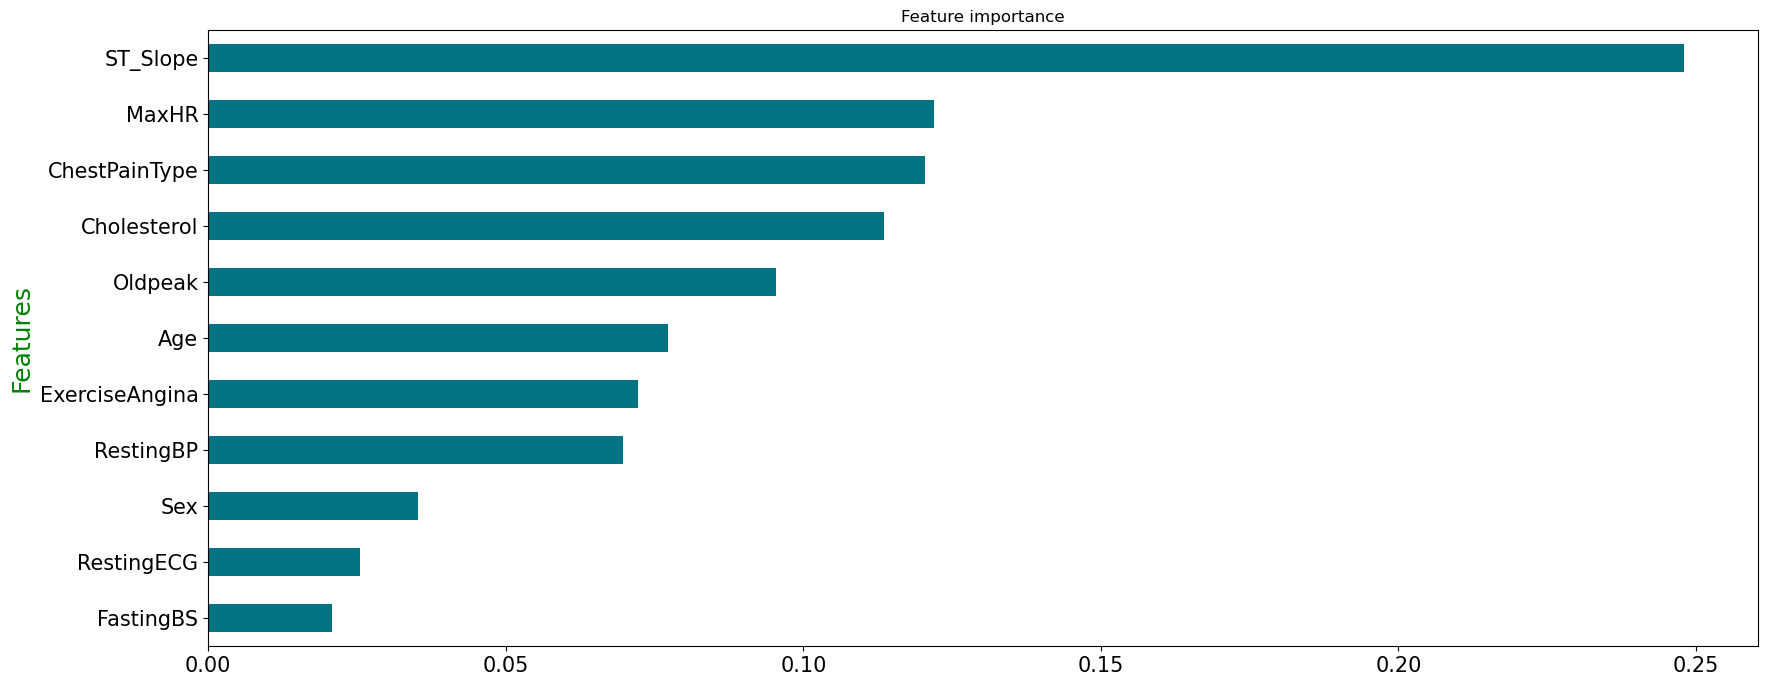

In [62]:
importance = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

### XGBoost

In [63]:
xgb = XGB()
preds = xgb.fit(X_train, Y_train).predict(X_val)

print(f'Accuracy on Testing Data : {accuracy_score(Y_val, preds):.4f}\n')
print(f'Confusion Matrix :\n{confusion_matrix(Y_val,preds)}\n')
print(classification_report(Y_val,preds))

Accuracy on Testing Data : 0.9130

Confusion Matrix :
[[38  6]
 [ 2 46]]

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.88      0.96      0.92        48

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



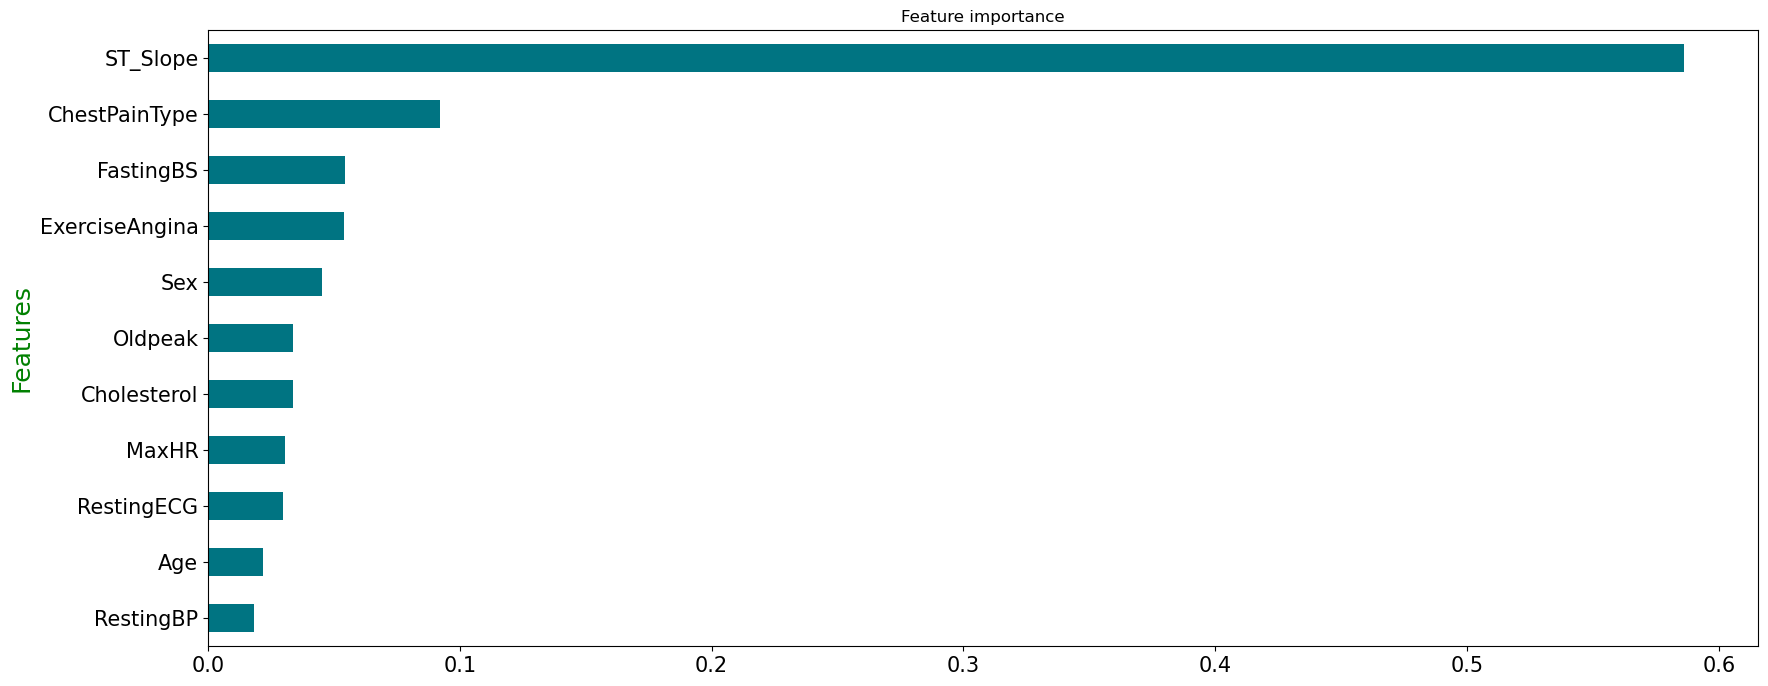

In [64]:
importance = pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

K-Fold cross validation on XGB

In [65]:
KF = KFold(n_splits=15, shuffle=True)
ksplits = KF.split(X_train, Y_train)
print(ksplits)
scores = cross_val_score(xgb,X_train,Y_train,cv=14)
print(scores)

<generator object _BaseKFold.split at 0x0000027044B3E500>
[0.80434783 0.80434783 0.86956522 0.89130435 0.82608696 0.84782609
 0.7826087  0.91304348 0.82608696 0.89130435 0.7826087  0.82608696
 0.82222222 0.82222222]


### AdaBoost

In [66]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
preds = ada.predict(X_val)


print(f'Accuracy on Testing Data : {accuracy_score(Y_val, preds):.4f}\n')
print(f'Confusion Matrix :\n{confusion_matrix(Y_val,preds)}\n')
print(classification_report(Y_val,preds))

Accuracy on Testing Data : 0.8261

Confusion Matrix :
[[36  8]
 [ 8 40]]

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        48

    accuracy                           0.83        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92



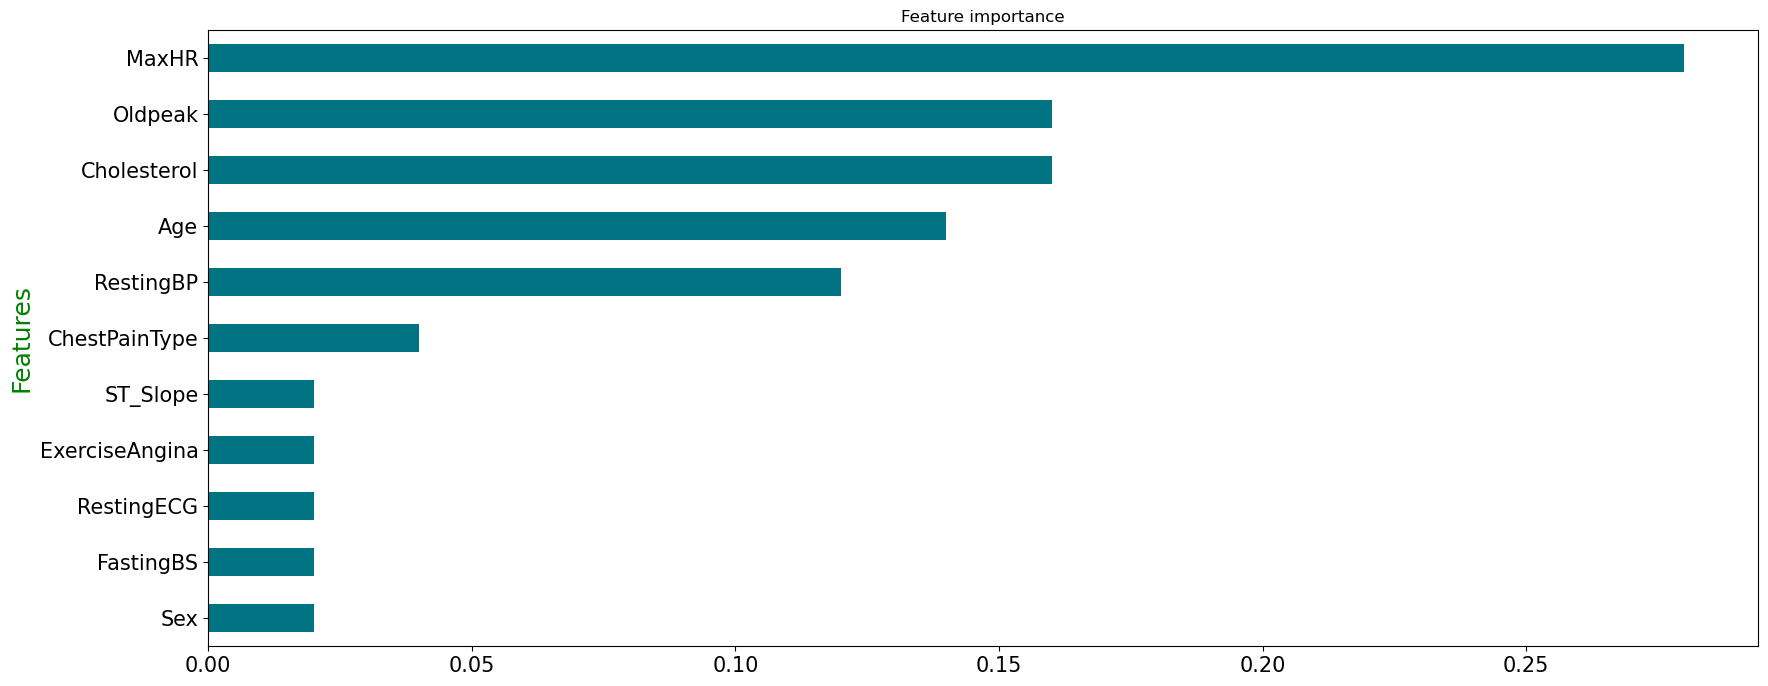

In [67]:
importance = pd.Series(ada.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

### Logistic Regression

In [68]:
lr = LR()
lr.fit(X_train,Y_train)
preds = lr.predict(X_val)

print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val,preds))
print(classification_report(Y_val,preds))

0.8369565217391305
[[36  8]
 [ 7 41]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.84      0.85      0.85        48

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92



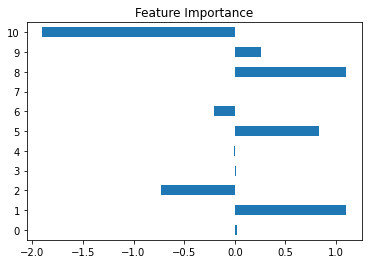

In [ ]:
lr.fit(X_train,Y_train)
# importance = pd.Series(lr.feature_importances_,index=X_train.columns).sort_values()

importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.plot(kind='barh',title = 'Feature Importance')


plt.show()

### LGBM Classifier

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train,Y_train)

preds = lgb.predict(X_val)

print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val,preds))
print(classification_report(Y_val,preds))

0.9130434782608695
[[38  6]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.88      0.96      0.92        48

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



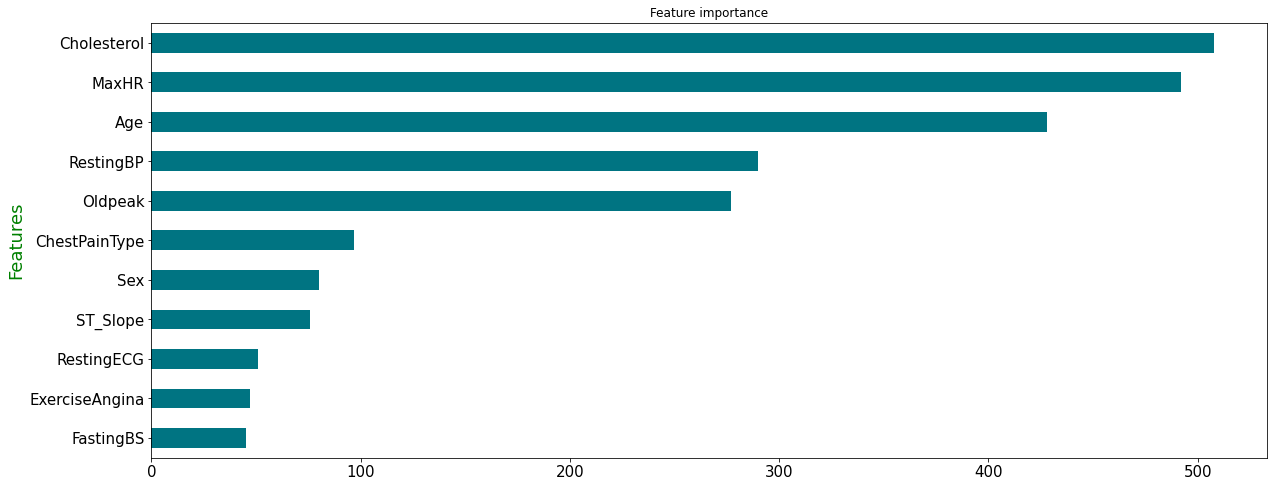

In [ ]:
lgb.fit(X_train,Y_train)
importance = pd.Series(lgb.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

### Gaussian Naive Bayes

In [ ]:
gb = GaussianNB()
gb.fit(X_train,Y_train)

preds = gb.predict(X_val)

print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val,preds))
print(classification_report(Y_val,preds))

0.8478260869565217
[[38  6]
 [ 8 40]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.87      0.83      0.85        48

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92



### Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
preds = gbc.predict(X_val)
print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val,preds))
print(classification_report(Y_val,preds))

0.8804347826086957
[[38  6]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.88      0.90      0.89        48

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



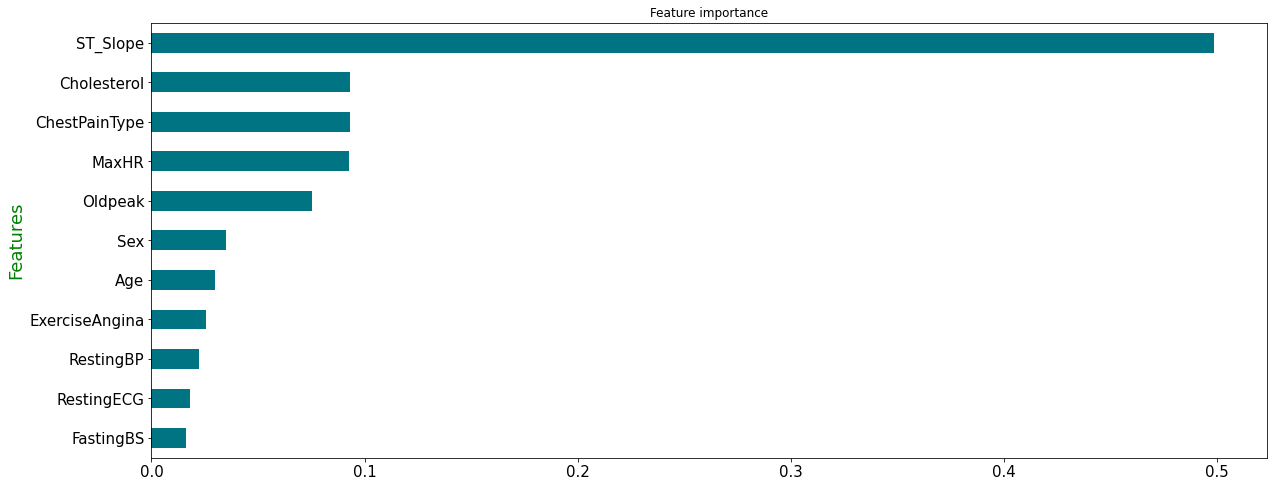

In [ ]:
gbc.fit(X_train,Y_train)
importance = pd.Series(gbc.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preds = dtc.predict(X_val)
print(accuracy_score(Y_val, preds))
print(confusion_matrix(Y_val,preds))
print(classification_report(Y_val,preds))

0.8152173913043478
[[34 10]
 [ 7 41]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.83        48

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.82      0.82      0.81        92



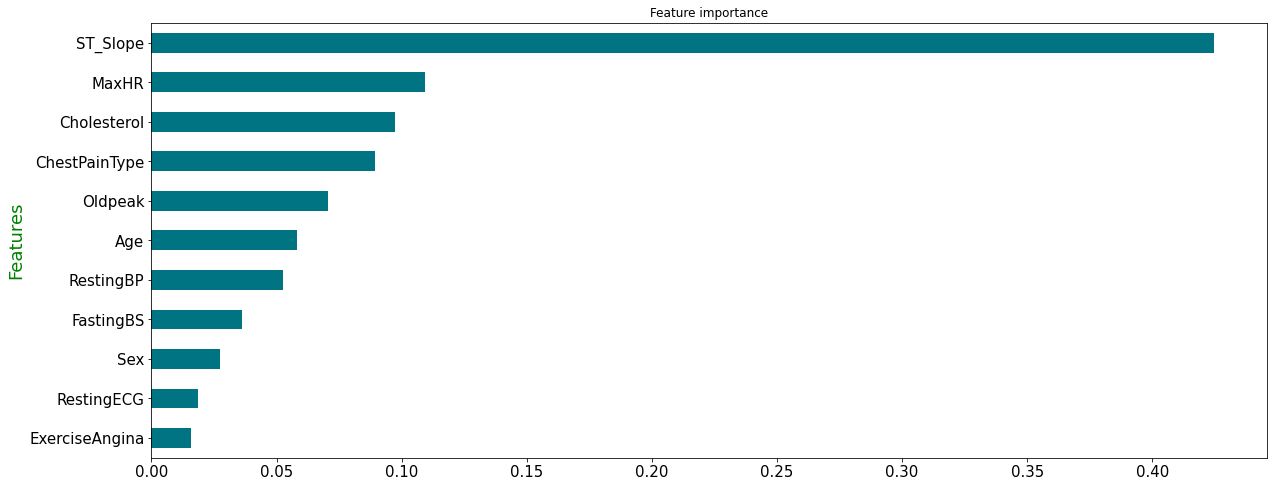

In [ ]:
dtc.fit(X_train,Y_train)
importance = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

# **Final Classification**

### Conactenate the training and validation data to create new train data and now testing data is used for accuracy calculation

In [ ]:
X_train = pd.concat((X_train, X_val))
Y_train = pd.concat((Y_train, Y_val))

### Initialise list of models that need to be taken as input in the implemented Class

In [ ]:
models = [XGB(),
 RandomForestClassifier(random_state=0),
 LGBMClassifier(),
 GradientBoostingClassifier(),
 GaussianNB()]
models

[XGBClassifier(),
 RandomForestClassifier(random_state=0),
 LGBMClassifier(),
 GradientBoostingClassifier(),
 GaussianNB()]

### Implementation of Class named as DRY which contains various new strategies for final predictions 

In [ ]:
class DRY:
  def __init__(self,models,metric):
    self.models = models # list of all models that wanted to be analyzed
    self.n = len(models)
    self.metric = metric

  def fit(self,X_train,y_train,X_test,y_test):
    self.X_test = X_test
    self.X_train = X_train
    self.y_train = y_train
    self.y_test = y_test
    self.all_preds = []
    self.accuraciz = []
    self.probas_0 = []
    self.probas_1 = []
    for mod in self.models:
      mod.fit(self.X_train,self.y_train)
      pred = mod.predict(self.X_test)
      self.probas_0.append(mod.predict_proba(self.X_test)[:,0])
      self.probas_1.append(mod.predict_proba(self.X_test)[:,1])
      self.all_preds.append(pred)
      self.accuraciz.append(self.metric(self.y_test,pred))
    self.all_preds = np.array(self.all_preds)
    self.accuraciz = np.array(self.accuraciz)
    self.probas_0 = np.array(self.probas_0)
    self.probas_1 = np.array(self.probas_1)

  def mod_accuracy(self):
    self.mod_preds = []
    for arr in self.all_preds.T:
      vals,counts = np.unique(arr, return_counts=True)
      index = np.argmax(counts)
      self.mod_preds.append(vals[index])
    self.mod_preds = np.array(self.mod_preds)
    return self.metric(self.y_test,self.mod_preds)
  
  def mean_proba_accuracy(self):
    self.mean_probas_act = np.mean(self.probas_1,axis=0)
    self.mean_probas = np.round(np.mean(self.probas_1,axis=0)).astype(int)
    return self.metric(self.y_test,self.mean_probas)
  
  def weighted_mean_accuracy(self):
    self.weighted_pred = np.round(np.average(self.all_preds,weights=self.accuraciz,axis=0)).astype(int)
    return self.metric(self.y_test,self.weighted_pred)

  def weighted_proba_mean_accuracy(self):
    self.weighted_pred_proba = np.round(np.average(self.probas_1,weights=self.accuraciz,axis=0)).astype(int)
    return self.metric(self.y_test,self.weighted_pred_proba)


In [ ]:
dry = DRY(models,accuracy_score )
dry.fit(X_train,Y_train,X_test,Y_test)

### Accuracy score for all the implemented methodologies

In [ ]:
print('\nAccuracy Score for all the models\n')

print('-----------------------------------------------------------------------------')
print(f'| Accuracy score for mode of all the models:                       | {dry.mod_accuracy():.4f} |')
print(f'| Accuracy score for mean proba values of all the models:          | {dry.mean_proba_accuracy():.4f} |')
print(f'| Accuracy score for weighted mean of all the models:              | {dry.weighted_mean_accuracy():.4f} |')
print(f'| Accuracy score for weighted mean proba values of all the models: | {dry.weighted_proba_mean_accuracy():.4f} |')
print('-----------------------------------------------------------------------------\n')



Accuracy Score for all the models

-----------------------------------------------------------------------------
| Accuracy score for mode of all the models:                       | 0.9130 |
| Accuracy score for mean proba values of all the models:          | 0.9000 |
| Accuracy score for weighted mean of all the models:              | 0.9130 |
| Accuracy score for weighted mean proba values of all the models: | 0.9000 |
-----------------------------------------------------------------------------



### Precision score for all the implemented methodologies

In [ ]:
dry = DRY(models,precision_score )
dry.fit(X_train,Y_train,X_test,Y_test)
print('\nPrecision Score for all the models\n')

print('------------------------------------------------------------------------------')
print(f'| Precision score for mode of all the models:                       | {dry.mod_accuracy():.4f} |')
print(f'| Precision score for mean proba values of all the models:          | {dry.mean_proba_accuracy():.4f} |')
print(f'| Precision score for weighted mean of all the models:              | {dry.weighted_mean_accuracy():.4f} |')
print(f'| Precision score for weighted mean proba values of all the models: | {dry.weighted_proba_mean_accuracy():.4f} |')
print('------------------------------------------------------------------------------\n')


Precision Score for all the models

------------------------------------------------------------------------------
| Precision score for mode of all the models:                       | 0.9213 |
| Precision score for mean proba values of all the models:          | 0.9194 |
| Precision score for weighted mean of all the models:              | 0.9213 |
| Precision score for weighted mean proba values of all the models: | 0.9194 |
------------------------------------------------------------------------------



### Recall score for all the implemented methodologies

In [ ]:
dry = DRY(models,recall_score )
dry.fit(X_train,Y_train,X_test,Y_test)
print('\nRecall Score for all the models\n')

print('---------------------------------------------------------------------------')
print(f'| Recall score for mode of all the models:                       | {dry.mod_accuracy():.4f} |')
print(f'| Recall score for mean proba values of all the models:          | {dry.mean_proba_accuracy():.4f} |')
print(f'| Recall score for weighted mean of all the models:              | {dry.weighted_mean_accuracy():.4f} |')
print(f'| Recall score for weighted mean proba values of all the models: | {dry.weighted_proba_mean_accuracy():.4f} |')
print('---------------------------------------------------------------------------\n')


Recall Score for all the models

---------------------------------------------------------------------------
| Recall score for mode of all the models:                       | 0.9213 |
| Recall score for mean proba values of all the models:          | 0.8976 |
| Recall score for weighted mean of all the models:              | 0.9213 |
| Recall score for weighted mean proba values of all the models: | 0.8976 |
---------------------------------------------------------------------------



### F1-score for all the implemented methodologies

In [ ]:
dry = DRY(models,f1_score )
dry.fit(X_train,Y_train,X_test,Y_test)
print('\nF1-Score Score for all the models\n')

print('-----------------------------------------------------------------------------')
print(f'| F1-Score score for mode of all the models:                       | {dry.mod_accuracy():.4f} |')
print(f'| F1-Score score for mean proba values of all the models:          | {dry.mean_proba_accuracy():.4f} |')
print(f'| F1-Score score for weighted mean of all the models:              | {dry.weighted_mean_accuracy():.4f} |')
print(f'| F1-Score score for weighted mean proba values of all the models: | {dry.weighted_proba_mean_accuracy():.4f} |')
print('-----------------------------------------------------------------------------\n')


F1-Score Score for all the models

-----------------------------------------------------------------------------
| F1-Score score for mode of all the models:                       | 0.9213 |
| F1-Score score for mean proba values of all the models:          | 0.9084 |
| F1-Score score for weighted mean of all the models:              | 0.9213 |
| F1-Score score for weighted mean proba values of all the models: | 0.9084 |
-----------------------------------------------------------------------------



### ROC plots of all the chosen models

In [ ]:
def roc_plotting(model,model_name):
  cv = StratifiedKFold(n_splits=10)

  fig1 = plt.figure(figsize=[12,8])
  ax1 = fig1.add_subplot(111,aspect = 'equal')
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X,Y):
      model.fit(X.iloc[train].values,Y.iloc[train].values)
      prediction = model.predict_proba(X.iloc[test].values)
      fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC For {model_name}')
  plt.legend(loc="lower right")

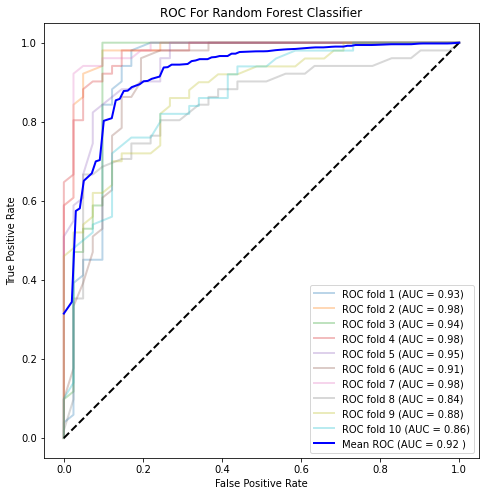

In [ ]:
roc_plotting(rfc,"Random Forest Classifier")

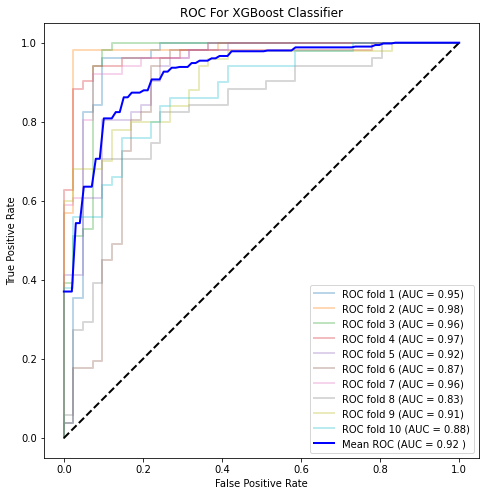

In [ ]:
roc_plotting(xgb,"XGBoost Classifier")

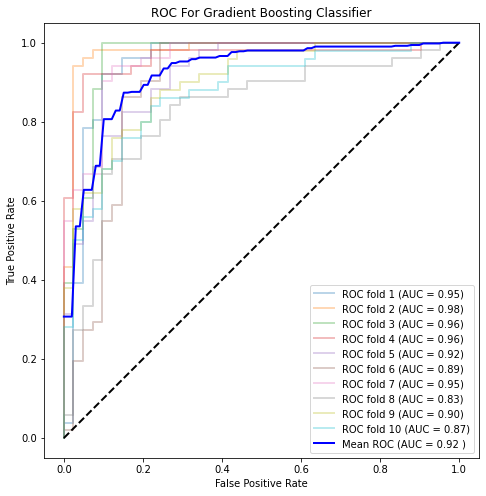

In [ ]:
roc_plotting(gbc,"Gradient Boosting Classifier")

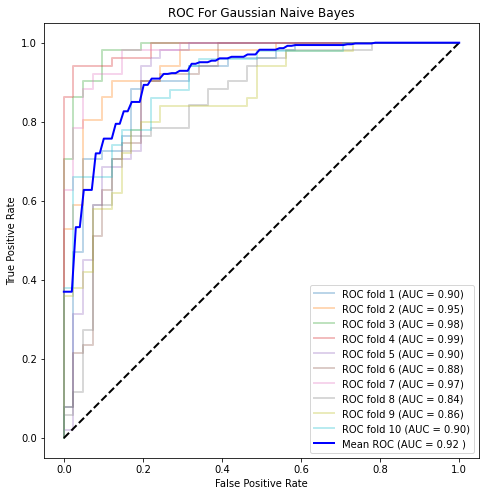

In [ ]:
roc_plotting(gb,"Gaussian Naive Bayes")

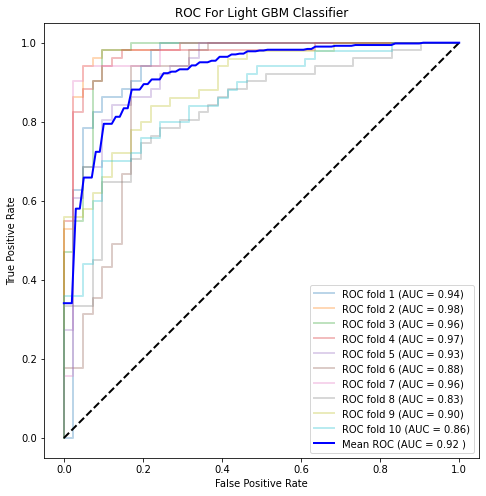

In [ ]:
roc_plotting(lgb,"Light GBM Classifier")

### Combined ROC plot for all the models along with K Fold values

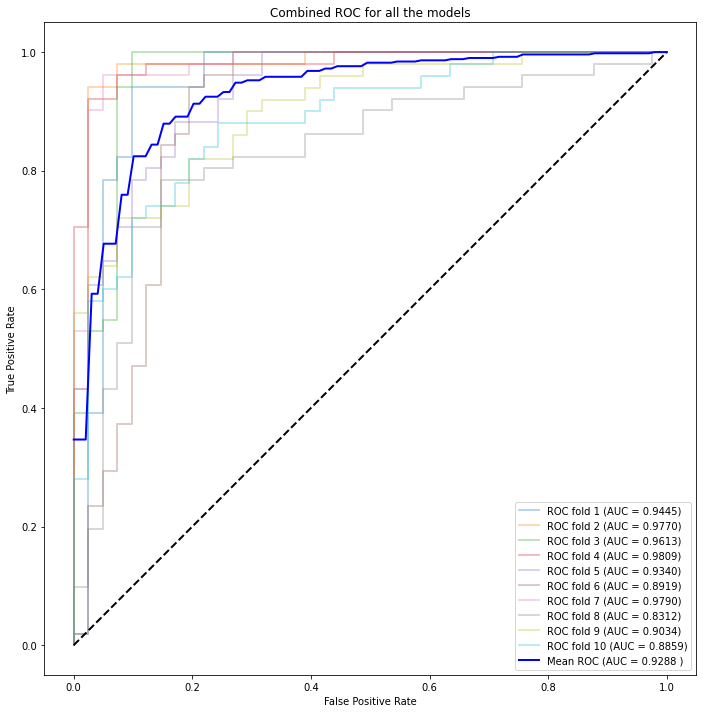

In [ ]:
cv = StratifiedKFold(n_splits=10)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,Y):
    dry = DRY(models,accuracy_score)
    dry.fit(X.iloc[train].values,Y.iloc[train].values,X.iloc[test].values,Y.iloc[test].values)

    # prediction = gbc.predict_proba(X.iloc[test].values)
    mean_probas = np.mean(dry.probas_1,axis=0)
    fpr, tpr, t = roc_curve(Y[test], mean_probas)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.4f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC for all the models')
plt.legend(loc="lower right")